# Exercícios:

1. Reproduzir o último exercício trocando o dataset load_digits pelo dataset MNIST. Utilize apenas as primeiras 2 mil amostras para treinamento e as próximas mil amostras para teste.

Material baseado em: https://realpython.com/logistic-regression-python/

---

## 1. Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Pré-processamento

### 2a. Importando MNIST
ref: https://github.com/ageron/handson-ml/issues/301#issuecomment-448853256

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
X, y = fetch_openml('mnist_784', version=1, cache=True, data_home='~/data', return_X_y=True, as_frame=False)

In [5]:
# def sort_by_target(mnist):
#     reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
#     reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
#     mnist.data[:60000] = mnist.data[reorder_train]
#     mnist.target[:60000] = mnist.target[reorder_train]
#     mnist.data[60000:] = mnist.data[reorder_test + 60000]
#     mnist.target[60000:] = mnist.target[reorder_test + 60000]

# try:
#     from sklearn.datasets import fetch_openml
#     mnist = fetch_openml('mnist_784', version=1, cache=True)
#     mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
#     sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
# except ImportError:
#     from sklearn.datasets import fetch_mldata
#     mnist = fetch_mldata('MNIST original')

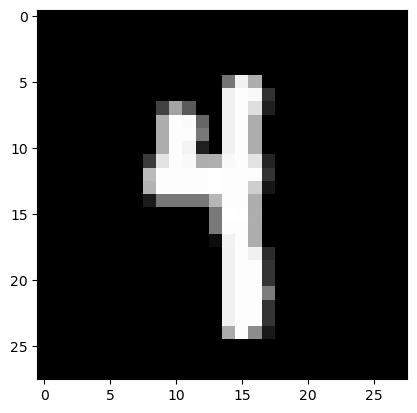

In [25]:
# Visualiznado alguns dígitos
sample = np.random.randint(0, len(X))
img = X[sample].reshape((28,28)).astype(np.uint8)

implot = plt.imshow(img, cmap="gray")

plt.show()

### 2b. Particionando o dataframe

In [6]:
# Hiperparâmetros
random_state = 42
train_sample = 2000
test_sample = 1000

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_sample, test_size=test_sample, random_state=random_state)

### 2c. Normalizando os dados

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Treinando o modelo

In [9]:
model = LogisticRegression(C=50. / train_sample, penalty='l1', solver='saga', tol=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.025, penalty='l1', solver='saga', tol=0.1)

## 4. Avaliando o modelo

### 4a. R^2

In [10]:
print('Acurácia sobre conjunto de treinamento = ', model.score(X_train, y_train))
print('Acurácia sobre conjunto de teste = ', model.score(X_test, y_test))

Acurácia sobre conjunto de treinamento =  0.848
Acurácia sobre conjunto de teste =  0.836


### 4b. Matriz de confusão

In [11]:
y_pred = model.predict(X_test)

In [12]:
confusion_matrix(y_test, y_pred)

array([[ 90,   0,   0,   0,   0,   2,   3,   0,   0,   0],
       [  0, 101,   1,   1,   0,   0,   0,   0,   1,   0],
       [  3,   6,  72,   1,   3,   1,   6,   2,   1,   0],
       [  0,   3,   3,  99,   0,   1,   0,   5,   4,   4],
       [  3,   2,   0,   0,  75,   1,   0,   0,   0,   7],
       [  2,   3,   1,  15,   1,  66,   1,   1,   0,   0],
       [  3,   2,   1,   0,   0,   2,  89,   0,   0,   0],
       [  2,   7,   0,   0,   2,   0,   1,  86,   0,   5],
       [  5,   6,   1,   5,   2,   3,   4,   0,  74,   1],
       [  2,   7,   0,   0,   5,   1,   0,   7,   2,  84]])

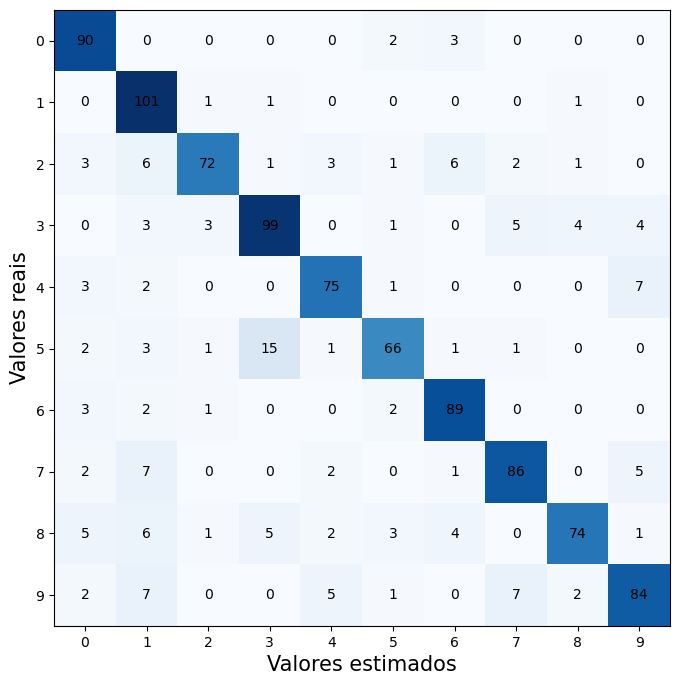

In [13]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.grid(False)
ax.set_xlabel('Valores estimados', fontsize=15, color='black')
ax.set_ylabel('Valores reais', fontsize=15, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.show()

### 4c. Vetor de Classificação  
ref: https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html

In [14]:
import time

In [15]:
t0 = time.time()

Example run in 0.550 s


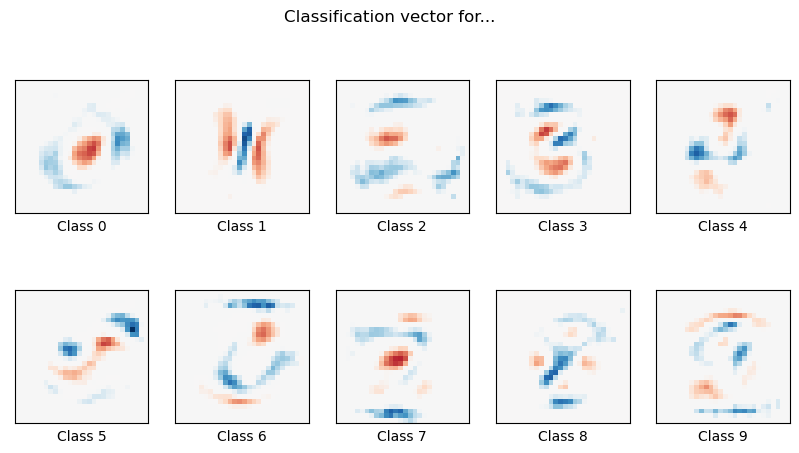

In [16]:
coef = model.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()

### 4d. Relatório

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        95
           1       0.74      0.97      0.84       104
           2       0.91      0.76      0.83        95
           3       0.82      0.83      0.82       119
           4       0.85      0.85      0.85        88
           5       0.86      0.73      0.79        90
           6       0.86      0.92      0.89        97
           7       0.85      0.83      0.84       103
           8       0.90      0.73      0.81       101
           9       0.83      0.78      0.80       108

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.83      1000

